In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [6]:
c = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
g = c.groupby(['character', 'year']).size()
g = g.unstack(0).fillna(0)
len(g)

47

In [7]:
d = g.Superman - g.Batman
len(d[d>0])

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [8]:
d = g.Batman - g.Superman
len(d[d>0])

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

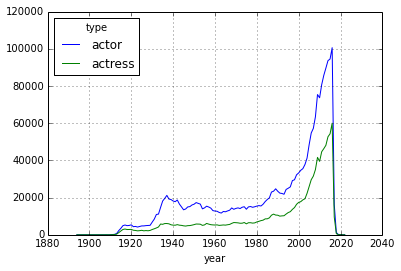

In [9]:
c = cast
c.groupby(['type','year']).size().unstack(0).fillna(0).plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

In [11]:
c = cast
c.groupby(['type','year']).size().unstack(0).fillna(0).plot(kind='area')

ValueError: Invalid chart type given area

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

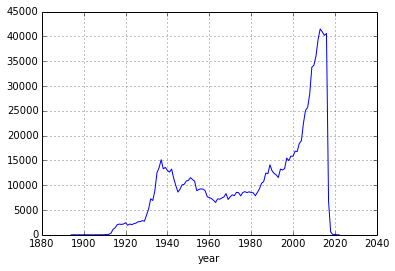

In [15]:
c = cast
g = c.groupby(['type','year']).size().unstack(0).fillna(0)
d = g.actor - g.actress
d.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

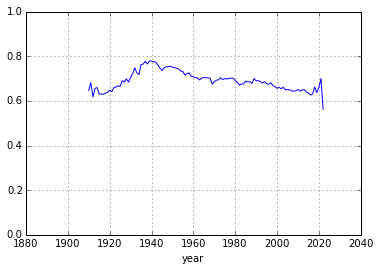

In [19]:
c = cast
g = c.groupby(['type','year']).size().unstack(0)
d = (g.actor)/(g.actor + g.actress)
d.plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

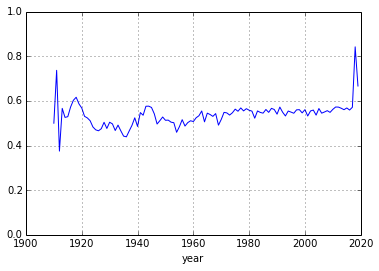

In [20]:
c = cast[cast.n == 2]
g = c.groupby(['type','year']).size().unstack(0)
d = (g.actor)/(g.actor + g.actress)
d.plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

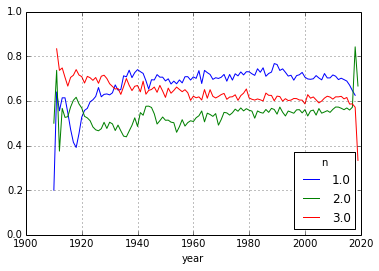

In [42]:
c = cast[(cast.n >= 1) & (cast.n <= 3)]
g = c.groupby(['year', 'type', 'n']).size().unstack('type')

d = (g.actor)/(g.actor + g.actress)
d = d.unstack('n')
d.plot(ylim=[0,1])


In [13]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]
g = c.groupby(['character', c.year // 10 * 10]).size()
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    1
                  1990    1
                  2000    1
dtype: int64

In [23]:
u = g.unstack(0).fillna(0)
u

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1,0
1980,4,1
1990,2,1
2000,1,1
2010,1,0


In [24]:
u['Kermit the Frog'] - u['Oscar the Grouch']

year
1970    1
1980    3
1990    1
2000    0
2010    1
dtype: float64

In [25]:
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    1
                  1990    1
                  2000    1
dtype: int64